In [1]:
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pylab as pl
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import osgeo.gdal as gdal
import skimage.io as SKimg
import scipy.io as sio

import sys
import ALLNeighborhoodrelationship as ABL

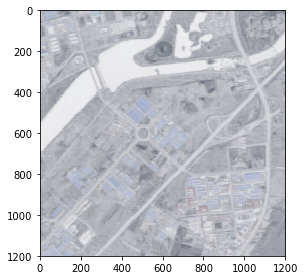

In [2]:
Tmul =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200ms.tif")
SKimg.imshow(Tmul)
SKimg.show()
Tmul.shape
Rows=Tmul.shape[0]; Cols=Tmul.shape[1]; 

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


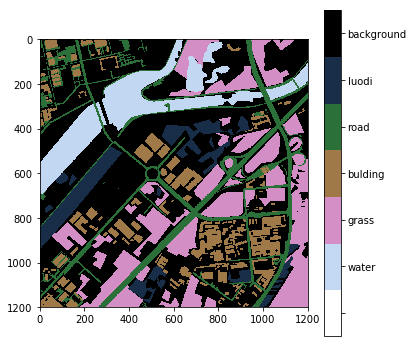

In [3]:
#matlab文件名  groudTrue
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

plt.figure(figsize=(6,6))
im = Image.fromarray(mk);
plt.imshow(im,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar();
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.show();

In [5]:
NewMul=ABL.MUltibandFour().flatten();

ALLMU=[];
for LI in range(0,len(NewMul)):
    T=np.array(NewMul[LI]);
    ALLMU.append(T);

ALLMU=np.array(ALLMU);

print(ALLMU);

[[ 31  39  61  83]
 [ 31  39  61  83]
 [ 31  39  61  83]
 ..., 
 [ 27  31  52 109]
 [ 27  31  52 108]
 [ 27  31  52 108]]


In [6]:
ALLlabel=[];   ALLclusCenters=[];
for i in range(4,9):
    KMS = KMeans(n_clusters=i, random_state=0).fit(ALLMU);
    Labels=KMS.labels_;  clus_centers=KMS.cluster_centers_;  ALLclusCenters.append(clus_centers);
    Score=KMS.score(ALLMU);
    ALLlabel.append(Labels);
    
print(ALLclusCenters[3]); print(len(ALLlabel[3]));

[[  39.96033141   45.23936622   66.01114763   65.58327388]
 [  31.03475135   36.84573712   56.30398788   87.30813976]
 [ 112.74967273  128.01309091  143.49309091  129.09992727]
 [  30.21268474   37.08013342   55.8423841   111.57768747]
 [  24.48390977   31.4165779    52.33265219   26.06433193]
 [  54.16228583   58.47043622   77.94693707   87.55480315]
 [  54.35913644   70.30382268  114.79369027   93.14635579]]


In [7]:
import math
ALLfinaLabel=[];
for j in range(0,len(ALLlabel)):
    finaLabel=mk-2;
    tempLabel=ALLlabel[j];
    for HL in range(0,len(tempLabel)):
        h=math.floor(HL/1200); l=HL%1200;
        finaLabel[h][l]=tempLabel[HL];
    ALLfinaLabel.append(finaLabel);

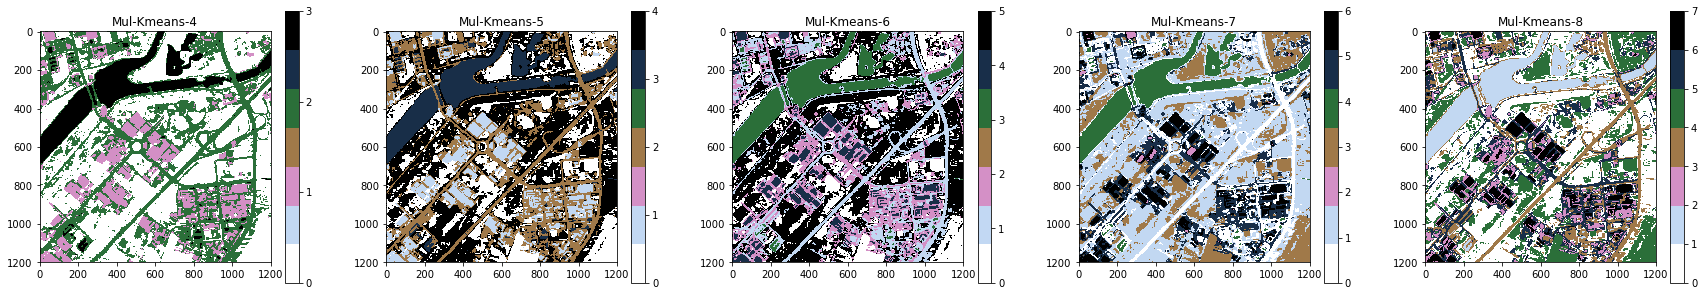

In [8]:
# 成图展示
plt.figure(figsize=(30,5));  titleName=['Mul-Kmeans-4','Mul-Kmeans-5','Mul-Kmeans-6','Mul-Kmeans-7','Mul-Kmeans-8'];
for index in range(0,len(ALLfinaLabel)):
    plt.subplot(1,5,index+1);
    mylabel=ALLfinaLabel[index];
    im2 = Image.fromarray(mylabel);
    plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',7));
    cbar=plt.colorbar();  cbar.set_ticks(np.linspace(0,7,8));
    plt.title(titleName[index]);
    #cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'));
    #plt.clim(-0.5,6.5)
plt.show();